
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**1.id** -  Unique id of rows

>**2.imdb_id** - imdb unique id

>**3.popularity** - movie popularity score

>**4.budget** - original budget of movie

>**5.revenue** - original proected revenue of movie

>**6.original_title** - original Movie title

>**7.cast**- cast in movie

>**8.homepage** - link to movie homepage

>**9.director** - name of movie director

>**10.tagline** - Movie tagline 

>**11.keywords** - movie keyword

>**12.overview** - movie overview

>**13.runtime** - movie duration

>**14.genres** - category of movie

>**15.production_companies** - name of production company

>**16.release_date** - release date of movie

>**17.vote_count** - vote casted by viewers or reviewers

>**18.vote_average** - average vote casted by viewers or reviewers

>**19.release_year** - year of movie released

>**20.budget_adj**- budget in 2010 dollars, considering inflation

>**21.revenue_adj** - revenue in 2010 dollars, factoring inflation


### Question(s) for Analysis
>**What Genre made the most this year?**

>**How much Profit did each Genre make?**

>**What's the Relationship of Budget to Revenue in the year?**

>**Is cast popularity associated with revenue?**


In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from itertools import chain

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tm_data = pd.read_csv('tmdb-movies.csv')

In [7]:
#printing first five rows to have a look
tm_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [8]:
tm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
 

In [9]:
tm_data.drop(['imdb_id', 'overview', 'homepage', 'vote_count', 'vote_average', 'release_year'], inplace = True, axis = 1);

In [10]:
tm_data = tm_data.dropna(how='any',axis=0) 

In [11]:
tm_data.count()

id                      7032
popularity              7032
budget                  7032
revenue                 7032
original_title          7032
cast                    7032
director                7032
tagline                 7032
keywords                7032
runtime                 7032
genres                  7032
production_companies    7032
release_date            7032
budget_adj              7032
revenue_adj             7032
dtype: int64

In [12]:
tm_data.shape

(7032, 15)

### I have dropped the columns that i feel are not neccessary in answering the questions that I have raised. Rows with empty values were also dropped to give me a more clean data. 


> ### Question 1: What Genre made the most this year?

In [13]:

tm_data['genres'] = tm_data['genres'].str.replace("|", " ");


In [14]:
tm_data.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action Adventure Science Fiction Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action Adventure Science Fiction Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure Science Fiction Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action Adventure Science Fiction Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action Crime Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,174799923.1,1.385749e+09


In [15]:
tm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 15 columns):
id                      7032 non-null int64
popularity              7032 non-null float64
budget                  7032 non-null int64
revenue                 7032 non-null int64
original_title          7032 non-null object
cast                    7032 non-null object
director                7032 non-null object
tagline                 7032 non-null object
keywords                7032 non-null object
runtime                 7032 non-null int64
genres                  7032 non-null object
production_companies    7032 non-null object
release_date            7032 non-null object
budget_adj              7032 non-null float64
revenue_adj             7032 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 879.0+ KB


In [16]:
list_of_genre = [];

for i, row in tm_data.iterrows():
    if i < 7032:
        list_of_genre.append(tm_data.iloc[i, 10].split(' '));
    
len(list_of_genre)
    


4177

In [17]:
#Function to make the array of array turn to a single one-dimentional array

def flatten(listOfLists):
    "Flatten one level of nesting"
    return chain.from_iterable(listOfLists)

In [18]:
#unique values in the array

list_of_genre = np.unique(list(flatten(list_of_genre)))

In [19]:
print(list_of_genre)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Fiction' 'Foreign' 'History' 'Horror' 'Movie' 'Music'
 'Mystery' 'Romance' 'Science' 'TV' 'Thriller' 'War' 'Western']


In [20]:
list_of_genre.shape

(22,)

In [21]:
total_revenue_by_genre = np.zeros(22)

for i in range(len(list_of_genre)):
    for index, row in tm_data.iterrows():
        if index < 7032:
            if list_of_genre[i] in tm_data.iloc[index, 10]:
                total_revenue_by_genre[i] += tm_data.iloc[index, 3]
    
len(total_revenue_by_genre)

22

In [22]:
print(total_revenue_by_genre)

[  1.05476153e+11   9.43548724e+10   2.73146229e+10   8.10179508e+10
   3.55234330e+10   5.35928062e+08   7.73268041e+10   4.89000789e+10
   5.08071513e+10   5.25223174e+10   3.32403900e+07   5.75402070e+09
   1.56987176e+10   0.00000000e+00   6.22081243e+09   2.02124589e+10
   3.43098966e+10   5.25223174e+10   0.00000000e+00   7.29065332e+10
   6.72299453e+09   3.25523083e+09]


In [23]:
revenue_data =  pd.DataFrame.from_dict({'Genre':list_of_genre, 'Revenue': total_revenue_by_genre})

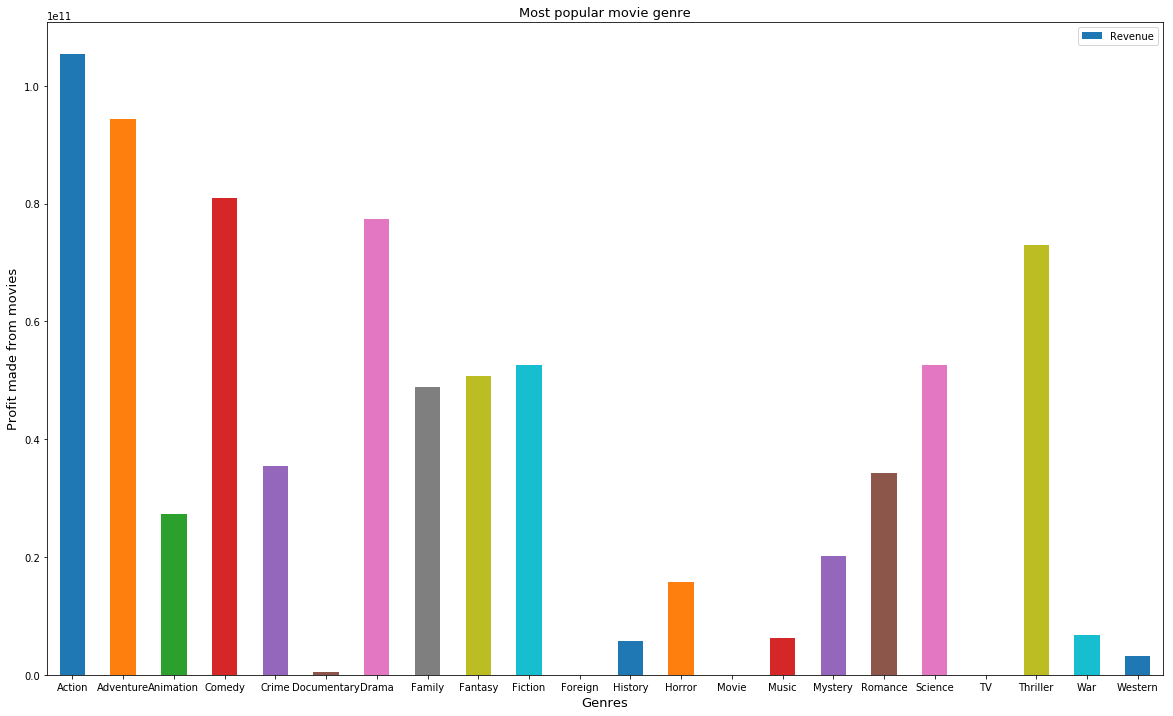

In [24]:
#Plot

g_bar = revenue_data.plot.bar(x='Genre', y='Revenue', rot=0, figsize=(20,12))

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Profit made from movies', color = 'black', fontsize = '13');

#### The Action Genre made the most revenue

> ### Question 2: How much Profit did each Genre make?

In [25]:
total_budget_by_genre = np.zeros(22)

for i in range(len(list_of_genre)):
    for index, row in tm_data.iterrows():
        if index < 7032:
            if list_of_genre[i] in tm_data.iloc[index, 10]:
                total_budget_by_genre[i] += tm_data.iloc[index, 2]
    
len(total_budget_by_genre)

22

In [26]:
total_profit_by_genre = np.zeros(22);

for i in range(22):
    total_profit_by_genre[i] = total_revenue_by_genre[i] / total_budget_by_genre[i];
    
print(total_profit_by_genre)

[ 2.79704608  3.08621307  3.19336124  2.9332917   2.57136163  3.33780241
  2.54770987  3.06343046  2.99239787  2.85107818  3.32399712  1.85648006
  2.65423058  0.          2.94970622  2.52194245  2.99962397  2.85107818
  0.          2.59037634  2.42529198  1.92922231]


In [27]:
profit_data = pd.DataFrame.from_dict({'Genre':list_of_genre, 'Profit': total_profit_by_genre})

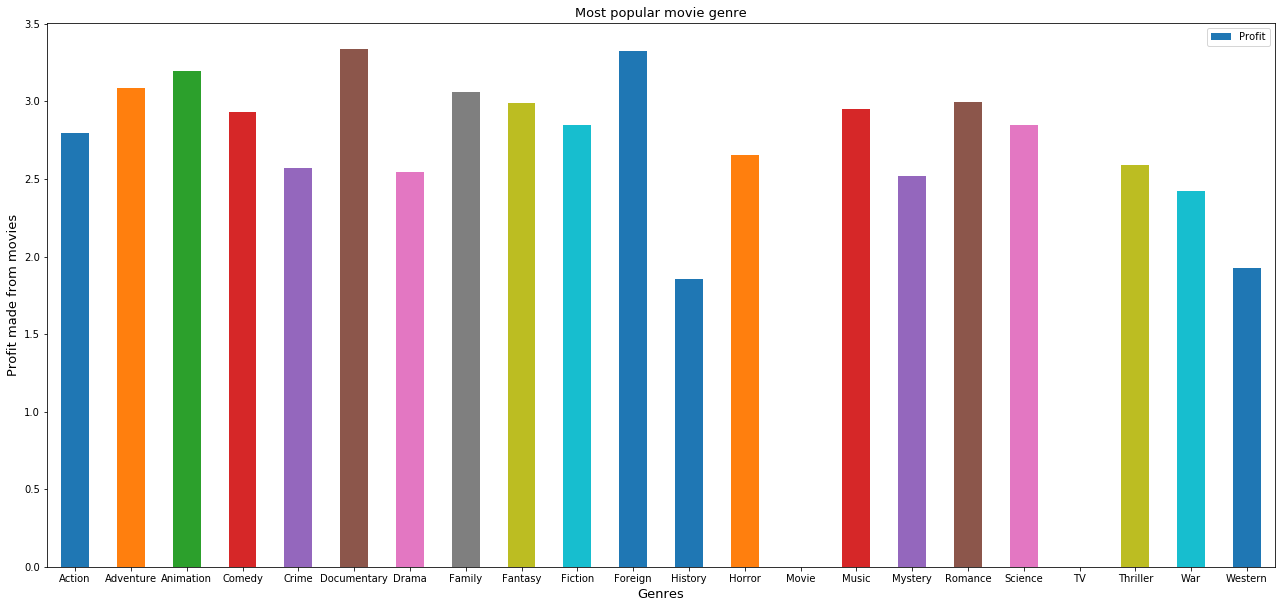

In [28]:
#Plot

ax = profit_data.plot.bar(x='Genre', y='Profit', rot=0, figsize=(22,10))

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Profit made from movies', color = 'black', fontsize = '13');

#### Although the Action Genre made the most revenue in 2015, Documentary and Foreign Genre made the most Profit (over 30%) despite both having one of the smallest budgets in the year 2015

> ### Question 3: What's the Relationship of Budget to Revenue in the year

##### Did the movie industry make a gain or a loss this year?

In [29]:
total_budget = 0;
total_revenue = 0;

for index, row in tm_data.iterrows():
        if index < 7032:
                total_budget += tm_data.iloc[index, 2]
                total_revenue += tm_data.iloc[index, 3]

print(total_revenue)
print(total_budget)

248997618594
88134650626


In [30]:
profit = total_revenue - total_budget;

print(profit)

160862967968


In [31]:
percent_profit = (profit/total_budget)*100

print(percent_profit)

182.519550285


#### 182% Profit was made by the movie industry in 2015

> ### Correlation

#### What is the correlation between budget and revenue  

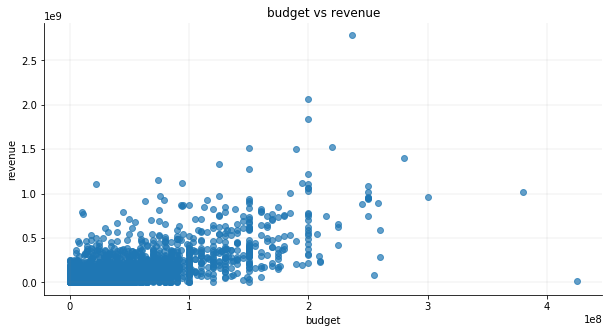

In [32]:
def scatterplot(mov, xz, yz):
  x = tm_data[xz]
  y = tm_data[yz]
  fig, ax = plt.subplots(figsize=(10, 5))

  #customizes alpha for each dot in the scatter plot
  ax.scatter(x, y, alpha=0.70)
 
 
  #adds a title and axes labels
  ax.set_title('budget vs revenue')
  ax.set_xlabel('budget')
  ax.set_ylabel('revenue')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()
scatterplot(tm_data, 'budget', 'revenue')

In [33]:
tm_data['budget'].corr(tm_data['revenue'])

0.72563453573225301

>The above scatter plot shows a strong positive correlation between budget and Revenue.

#### What is the correlation between revenue and popularity

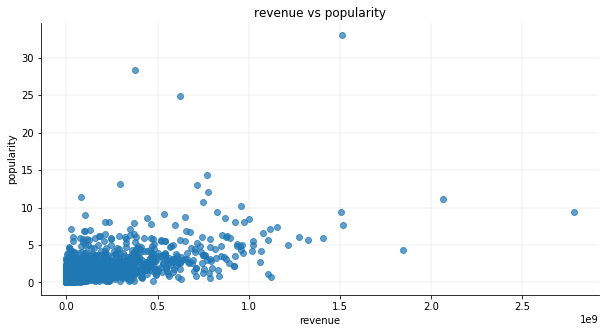

In [34]:
def scatterplot(mov, xz, yz):
  x = tm_data[xz]
  y = tm_data[yz]
  fig, ax = plt.subplots(figsize=(10, 5))

  #customizes alpha for each dot in the scatter plot
  ax.scatter(x, y, alpha=0.70)
 
 
  #adds a title and axes labels
  ax.set_title('revenue vs popularity')
  ax.set_xlabel('revenue')
  ax.set_ylabel('popularity')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()
scatterplot(tm_data, 'revenue', 'popularity')

In [35]:
tm_data['revenue'].corr(tm_data['popularity'])

0.65328206797735322

>The above scatter plot shows a strong positive correlation between budget and Revenue.

Populating the interactive namespace from numpy and matplotlib


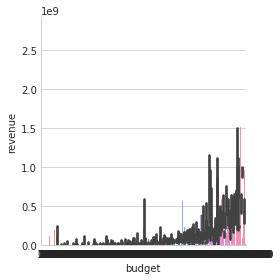

In [47]:
%pylab inline
#sns.factorplot('budget','revenue', data = tm_data, kind = 'bar')

sns.factorplot('budget', 'revenue', data = tm_data, kind = 'bar')


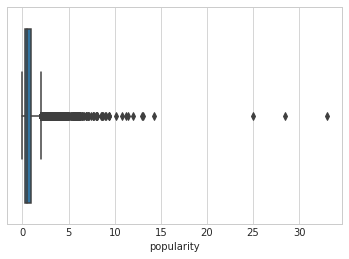

In [44]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=tm_data["popularity"])

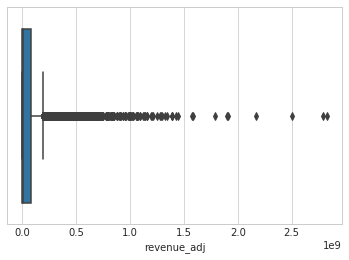

In [46]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=tm_data["revenue_adj"])

<a id='conclusions'></a>
## Conclusions

> ### The Results 
Looking at the data as a production company that intend to produce a movie, my area of intrest was on what genre of movies made the most money and how the budget contributed im making that possible.

> I have found out that Action movies are the highest grossing movies and there is a direct relation between budget and revenue. My next movie proect will be action based on my findings here. 

>The above scatter plot shows a strong positive correlation between budget and Revenue.

>The above scatter plot shows a strong positive correlation between budget and Revenue.

> ### Limitations
> Additional data on production costs will help me look and the relationship between the cost of production and the revenue from the movies accross all the genres.

> Having a breakdown of the production costs and the duration of production will also go a long way to determining the efforts and resources that my company will put into a movie project.


In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0